Number of Omega-automaton states (including the trap state): 3


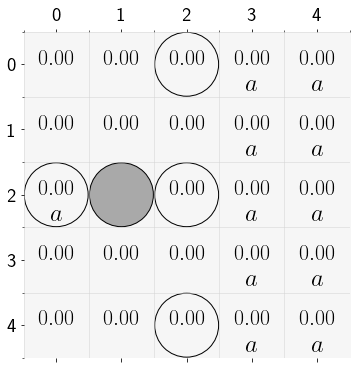

In [4]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# Specification
ltl = 'F G a & G !b'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['T',  'B',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'T',  'E',  'E']
])

label = np.array([
    [(),        (),        (),        ('a',),        ('a',)],
    [(),        (),        (),        ('a',),        ('a',)],
    [('a',),    (),        (),        ('a',),        ('a',)],
    [(),        (),        (),        ('a',),        ('a',)],
    [(),        (),        (),        ('a',),        ('a',)],
],dtype=np.object)

# discount = 0.999999
# discountB = 0.9999
# discountB = 0.99
reward = np.zeros(shape)

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,second_agent=('b',))  # Use figsize=4 for smaller figures
grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [5]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 0, ('a',): 0, ('b',): 1, ('a', 'b'): 1},
  {(): 1, ('a',): 1, ('b',): 1, ('a', 'b'): 1},
  {(): 2, ('a',): 2, ('b',): 2, ('a', 'b'): 2}],
 'acc': [{(): [False], ('a',): [True], ('b',): [None], ('a', 'b'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('a', 'b'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('a', 'b'): [None]}],
 'shape': (1, 3),
 'spot_oa': None,
 'eps': [[], [], []]}

In [ ]:
Q,Q_=csrl.minimax_q(T=2**10,K=2**15,start=(0,4),start_=(4,0))

In [ ]:
policy = np.argmax(Q,axis=-1)
policy_ = np.argmin(Q_,axis=-1)
value = np.max(Q,axis=-1)
csrl.plot(policy=policy,policy_=policy_)

In [ ]:
episode=csrl.simulate(policy,policy_,start=(0,4),start_=(4,0),T=1000,plot=True)

In [ ]:
# np.save('Q,Q_',(Q,Q_))